# Jane Chinwuko
# Batch number: DS2307

### Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
#### 1. Problem Statement: 
##### a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
##### b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


#### Dataset Description:
Number of columns: 23


##### Date  - The date of observation
##### Location  -The common name of the location of the weather station
##### MinTemp  -The minimum temperature in degrees celsius
##### MaxTemp -The maximum temperature in degrees celsius
##### Rainfall  -The amount of rainfall recorded for the day in mm
##### Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
##### Sunshine  -The number of hours of bright sunshine in the day.
##### WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
##### WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
##### WindDir9am -Direction of the wind at 9am
##### WindDir3pm -Direction of the wind at 3pm
##### WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
##### WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
##### Humidity9am -Humidity (percent) at 9am
##### Humidity3pm -Humidity (percent) at 3pm
##### Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
##### Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
##### Cloud9am - Fraction of sky obscured by cloud at 9am. 
##### Cloud3pm -Fraction of sky obscured by cloud 
##### Temp9am-Temperature (degrees C) at 9am
##### Temp3pm -Temperature (degrees C) at 3pm
##### RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
##### RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn import metrics

C:\Users\Omen\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loaded the dataset to a Pandas DataFrame
rainfall_predict = pd.read_csv('weatherAUS.csv')

## Exploratory Data Analysis

In [3]:
# Viewing the dimensions of the array
rainfall_predict.shape

(8425, 23)

This dataset contains 8425 rows and 23 columns (made up of the independent and target variables)

In [4]:
#Viewing the first 10 rows of the dataset
rainfall_predict.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


We have both categorical and numerical variables in our dataset. We have NaN values in our data

In [5]:
#Viewing the last 10 rows of the dataset
rainfall_predict.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8415,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
8416,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
8417,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
8418,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
#Viewing the columns present in the dataset
columns = rainfall_predict.columns
columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#Displays the basic information about the columns in the dataset
rainfall_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

The datatypes present in our dataset are object(7 variables) and float64(16 variables). The date column is not in the right format. We will need to convert the column to date format. 

In [8]:
#Generating the descriptive statistics of all the features in the dataset
rainfall_predict.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Our counts are not equal; there are missing values in our data.

In [9]:
#displaying the descriptive statistics of our categorical variables
rainfall_predict.describe(exclude=['float64','int64'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-01-31,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


There are also missing values in our categorical variables. Our target variable, RainTomorrow has two categories(Yes or No). This is a binary classification problem.

In [10]:
#Returns the count of unique occurrences in the location column.
rainfall_predict['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [11]:
#Returns the count of unique occurrences in the MinTemp column.
rainfall_predict['MinTemp'].value_counts()

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

In [12]:
#Returns the count of unique occurrences in the MaxTemp column.
rainfall_predict['MaxTemp'].value_counts()

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

In [13]:
#Returns the count of unique occurrences in the Rainfall column.
rainfall_predict['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

We have 5299 count of the value 0(zero) in our rainfall column. This is referred to as zero-inflated datasets. Alot of missing information and so will cause problems in our regression model. Regression model cannot predict zero values.

In [14]:
#Returns the count of unique occurrences in the Self_Employed column.
rainfall_predict['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

Our class is imbalance.

In [15]:
#Converting date column to date format
rainfall_predict['Date']=pd.to_datetime(rainfall_predict['Date'])
rainfall_predict['Month']=rainfall_predict['Date'].apply(lambda x:x.month)
rainfall_predict.Month = rainfall_predict.Month.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
rainfall_predict['Day']=rainfall_predict['Date'].apply(lambda x:x.day)
rainfall_predict['Year']=rainfall_predict['Date'].apply(lambda x:x.year)

We changed the date format and also separated the day,month and year. Three additional columns(Month,Day and Year) were created. 

In [16]:
#Dropping the Date column from the dataset
rainfall_predict = rainfall_predict.drop(['Date'], axis=1) 

## Data Visualization

<AxesSubplot:>

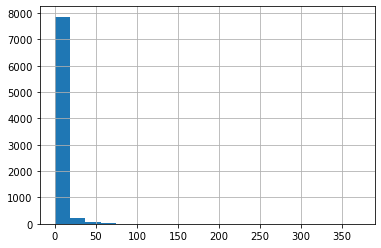

In [17]:
#Histogram of the Rainfall
rainfall_predict['Rainfall'].hist(bins = 20)

The data distribution is heavily skewed to the right. We have large number of zero values in our Rainfall column.

<function matplotlib.pyplot.show(close=None, block=None)>

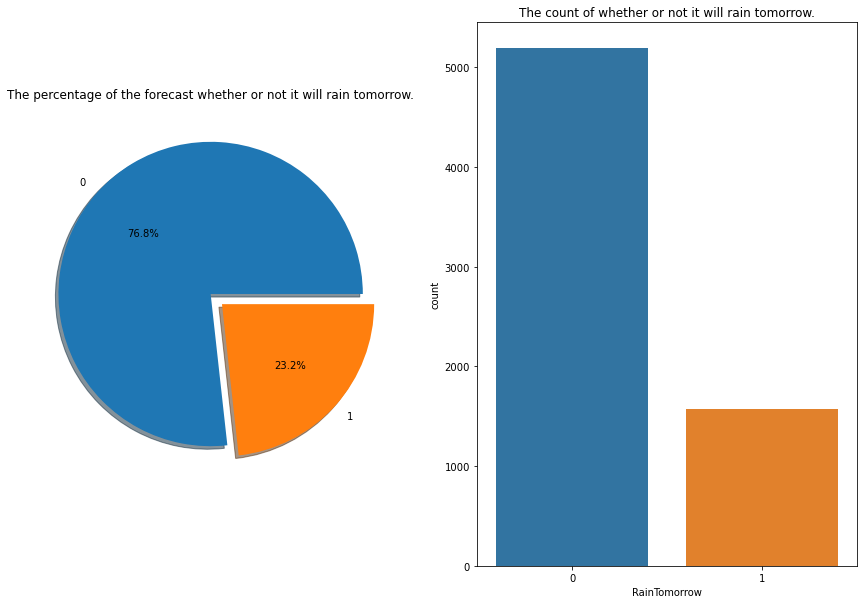

In [112]:
# This pieplot shows the percentage of the forecast whether or not it will rain tomorrow 
f, ax = plt.subplots(1,2, figsize = (15,10))
rainfall_predict['RainTomorrow'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('The percentage of the forecast whether or not it will rain tomorrow.')
ax[0].set_ylabel('')

# This countplot shows whether or not it will rain tomorrow
sns.countplot(x ='RainTomorrow', data = rainfall_predict,  ax = ax[1])
ax[1].set_title('The count of whether or not it will rain tomorrow.')
plt.show

We have 75.7% predictions that it will not rain tomorrow.

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

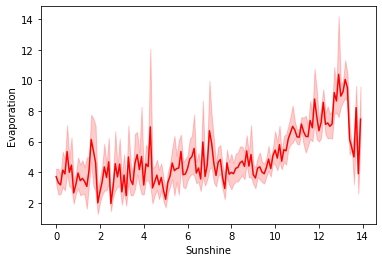

In [19]:
#lineplot of the Sunshine vs Evaporation
sns.lineplot(data=rainfall_predict,x='Sunshine',y='Evaporation',color='red')

Looking at the lineplot, we can say that Sunshine is proportional to the Evaporation. The energy content of water molecules rises with temperature, increasing the likelihood of their diffusion into the atmosphere.

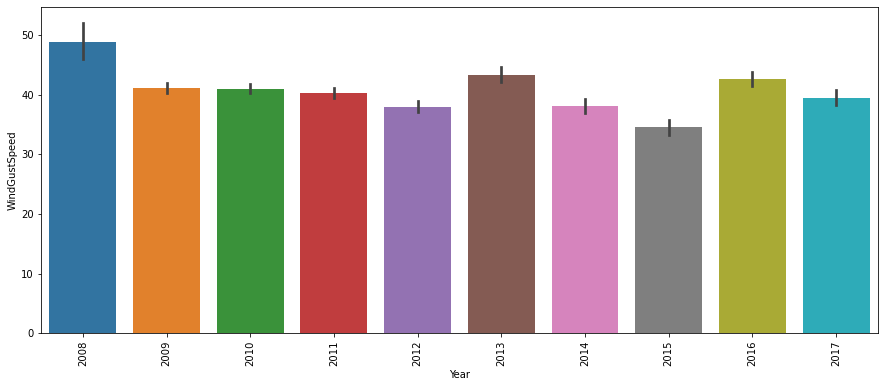

In [20]:
# barplot showing the distribution of WindGustSpeed by year
plt.figure(figsize = (15,6))
sns.barplot(x = 'Year',y='WindGustSpeed',data = rainfall_predict)
plt.xticks(rotation = 90)
plt.show()

We recorded the strongest wind gust in the 24 hours to midnight in the year 2008.

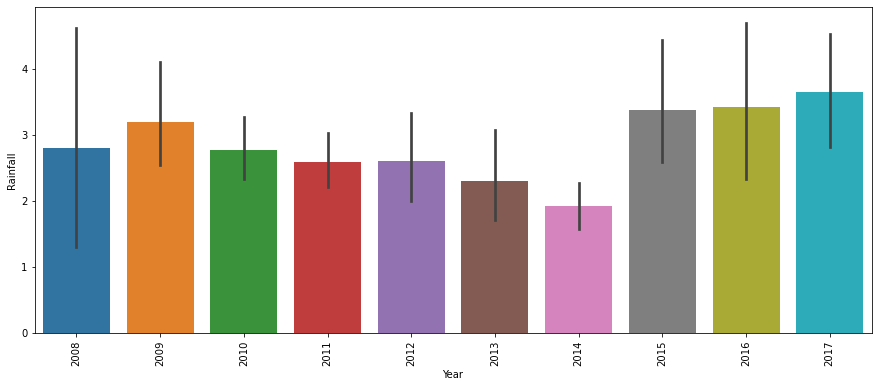

In [21]:
# barplot showing the distribution of rainfall yearly
plt.figure(figsize = (15,6))
sns.barplot(x = 'Year',y='Rainfall',data = rainfall_predict)
plt.xticks(rotation = 90)
plt.show()

We recorded more rainfalls between from the year 2015 to 2017.

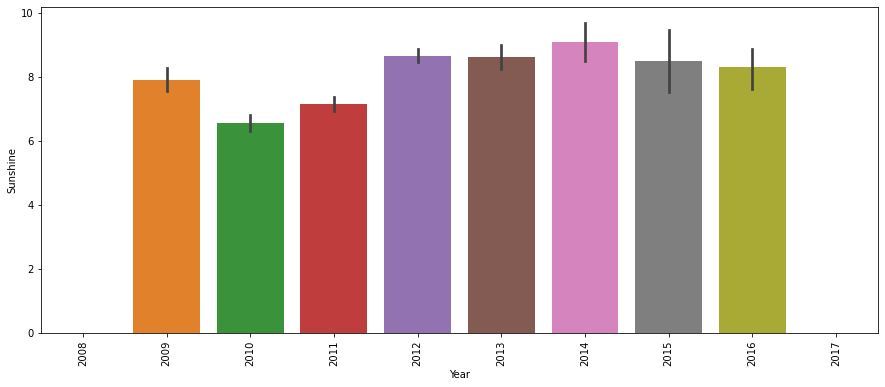

In [22]:
# barplot showing the distribution of Sunshine yearly
plt.figure(figsize = (15,6))
sns.barplot(x = 'Year',y='Sunshine',data = rainfall_predict)
plt.xticks(rotation = 90)
plt.show()

No sunsine was recorded in the year 2008. There was more sunshine recorded in 2014 than in other years.

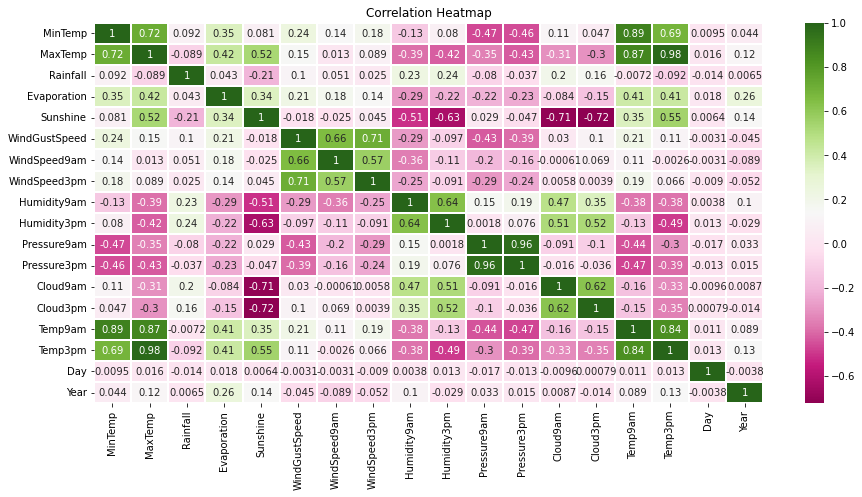

In [23]:
# Using heatmap to visualize the correlation between the numerical features.

plt.figure(figsize=(15,7))
sns.heatmap(rainfall_predict.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

There's a strong correlation between:
##### 1) MaxTemp and Temp3pm
##### 2) MaxTemp and Temp9am
##### 3) MinTemp and Temp9am
##### 4) MaxTemp and MinTemp
##### 5) Temp9am and Temp3pm


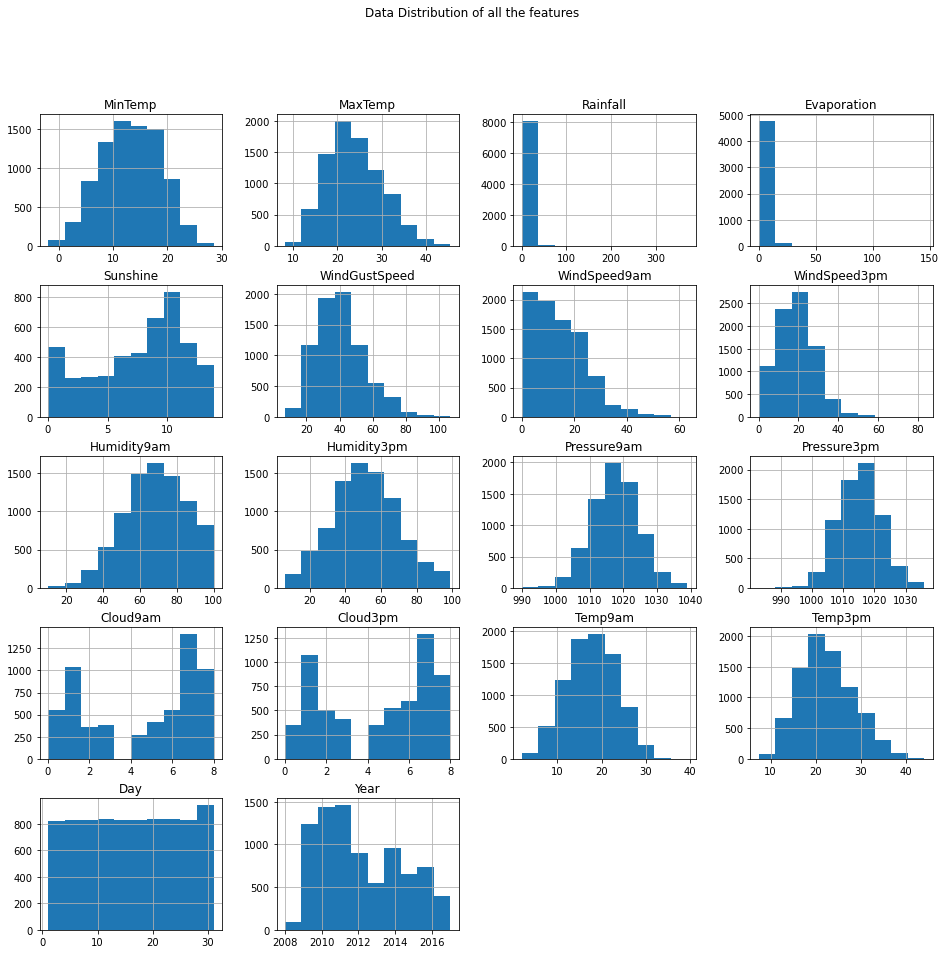

In [24]:
# Histogram containing all the columns
rainfall_predict.hist(bins=10, figsize=(16,15))
plt.suptitle("Data Distribution of all the features")
plt.show()

From the distribution, we can say that Temp9am, Humidity3pm, Pressure9am, Pressure3pm, MaxTemp, MinTemp are normally distributed.

## Data Pre-Processing

In [25]:
#checking for missing values
rainfall_predict.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Month               0
Day                 0
Year                0
dtype: int64

In [26]:
#gets the mode of each column of our categorical variables and fill in the missing values
rainfall_predict['WindGustDir'].fillna(rainfall_predict['WindGustDir'].mode()[0], inplace = True)
rainfall_predict['WindDir9am'].fillna(rainfall_predict['WindDir9am'].mode()[0], inplace = True)
rainfall_predict['WindDir3pm'].fillna(rainfall_predict['WindDir3pm'].mode()[0], inplace = True)
rainfall_predict['RainToday'].fillna(rainfall_predict['RainToday'].mode()[0], inplace = True)
rainfall_predict['RainTomorrow'].fillna(rainfall_predict['RainTomorrow'].mode()[0], inplace = True)

In [27]:
# Fetch the list of all the numerical variables in our data
num_missingvalue = (rainfall_predict.dtypes == "float64")
columns = list(num_missingvalue[num_missingvalue].index)

# Filling missing values with median of the column in value    
for column in columns:
    rainfall_predict[column].fillna(rainfall_predict[column].median(), inplace=True)
    

In [28]:
#checking for missing values after the treatment
rainfall_predict.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
Year             0
dtype: int64

We no longer have missing values in our data

In [29]:
# Printing the total number of duplicates across all the columns
duplicated = rainfall_predict.duplicated()

print("The number of duplicates in the dataset is:", rainfall_predict.duplicated().sum())

The number of duplicates in the dataset is: 1663


In [30]:
#display the duplicates
rainfall_predict[duplicated]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
3674,Williamtown,13.1,31.6,0.0,6.4,11.1,E,33.0,N,E,...,1016.4,1.0,1.0,21.5,30.3,No,No,OCT,20,2015
3675,Williamtown,16.6,34.1,0.0,6.6,9.9,NNW,44.0,NW,ESE,...,1010.6,1.0,5.0,24.7,30.2,No,Yes,OCT,21,2015
3676,Williamtown,17.5,26.3,19.8,7.8,8.7,SW,67.0,N,WNW,...,1008.3,8.0,6.0,18.6,25.6,Yes,No,OCT,22,2015
3677,Williamtown,14.7,21.4,0.0,4.6,8.7,S,59.0,WSW,SSW,...,1020.9,7.0,5.0,15.6,20.3,No,No,OCT,23,2015
3678,Williamtown,11.0,22.5,0.0,4.6,8.7,E,35.0,NW,E,...,1021.4,5.0,5.0,18.4,21.4,No,Yes,OCT,24,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,Melbourne,20.3,25.0,0.0,11.6,7.3,S,39.0,S,SSW,...,1014.0,8.0,2.0,20.8,23.8,No,No,JAN,25,2012
6144,Melbourne,16.1,24.5,0.0,4.4,12.4,S,50.0,S,S,...,1016.9,5.0,5.0,18.9,23.7,No,No,JAN,26,2012
6145,Melbourne,16.6,30.7,0.0,8.0,13.0,SSE,39.0,WSW,SSE,...,1013.5,5.0,5.0,20.5,26.3,No,No,JAN,27,2012
6146,Melbourne,20.0,30.4,0.0,8.2,12.1,SSE,37.0,SW,S,...,1009.2,5.0,5.0,24.1,27.4,No,No,JAN,28,2012


In [31]:
#Removing the duplicates
rainfall_predict.drop_duplicates(inplace=True)

<AxesSubplot:>

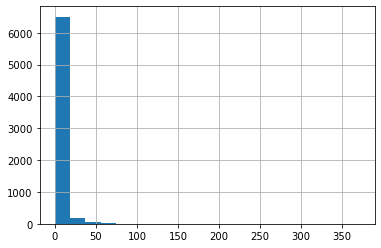

In [32]:
#Histogram of the Rainfall
rainfall_predict['Rainfall'].hist(bins = 20)

In [33]:
#dimension of the dataset after removing duplicates
rainfall_predict.shape

(6762, 25)

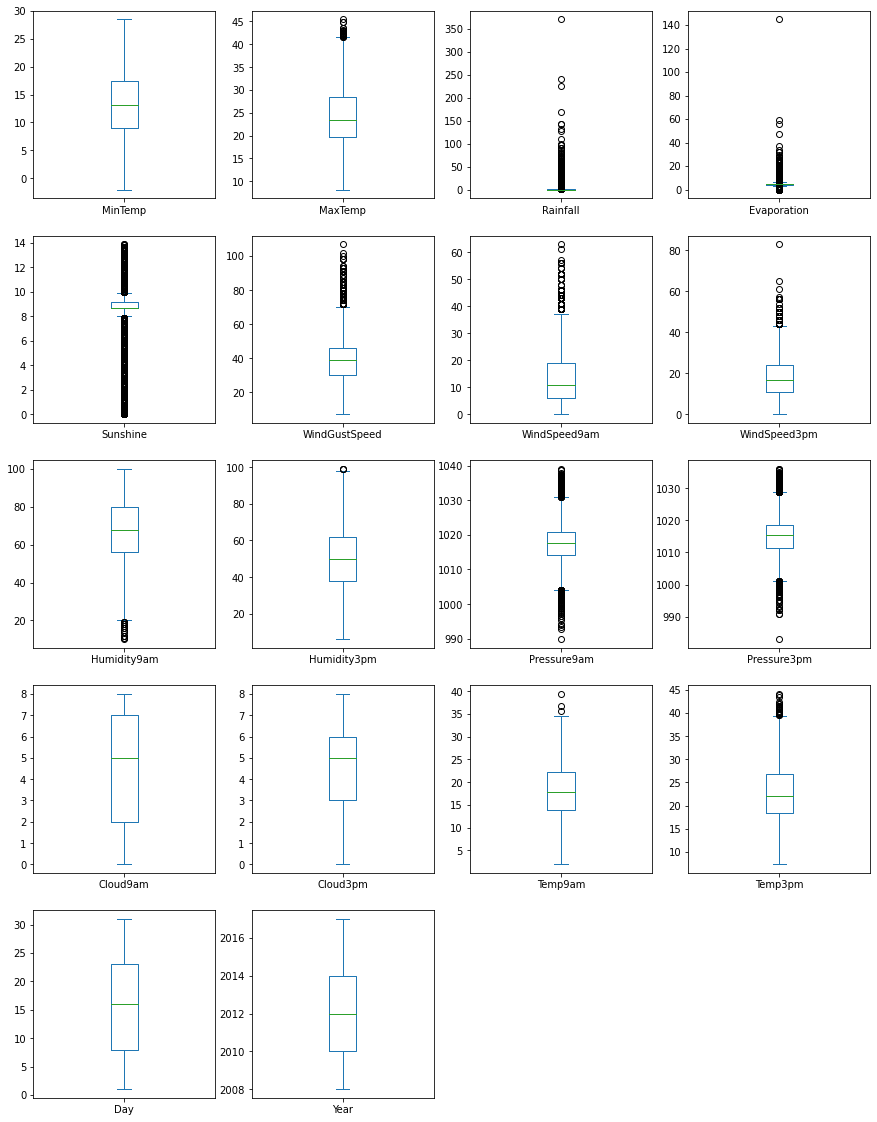

In [34]:
# using Boxplot to check for outliers
rainfall_predict.plot(kind = "box",subplots = True,layout = (5,4),figsize=(15,20)) 
plt.show()

In [35]:
# selected columns to check for outliers
columns = ['WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm',
       'Humidity9am','Rainfall','Evaporation']

# create an empty list to store values
column_names = []
total_outliers = []
percentage = []
least_outlier = []

outlierFilter=None

# loop through all column list
for column in columns:
    # finding the 1st quartile
    q1 = rainfall_predict[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = rainfall_predict[column].quantile(0.75)

    # get the column minimum and median values
    min_value = rainfall_predict[column].min()
    median_value = rainfall_predict[column].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Get the array data for wine_red
    arr1 = rainfall_predict[column]

    # Get the outliers in the columns using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    # get the min value of the outliers found
    min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0
    
    # calculate the percentage of the outliers found
    percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0
    
    # add values to the list
    column_names.append(column)
    total_outliers.append(len(outliers.values))
    least_outlier.append(min_value)
    percentage.append(percentage_value)
    
    # do this if outliers is less than or equal to 5%
    if round(percentage_value) <= 5 and len(outliers.values) > 0:
        # capping Outliers using IQR Ranges
        rainfall_predict.loc[(rainfall_predict[column] <= lower_bound), column] = lower_bound
        rainfall_predict.loc[(rainfall_predict[column] >= upper_bound), column] = upper_bound
        
    # do this if outliers is greater than 5%
    elif round(percentage_value) > 5 and len(outliers.values) > 0:
        # replacing outlier values with the median value
        rainfall_predict.loc[(rainfall_predict[column] <= lower_bound), column] = median_value
        rainfall_predict.loc[(rainfall_predict[column] >= upper_bound), column] = median_value


print('Outliers Table Summary')

# create a new dictionary
new_dict = {'Column Name': column_names, 'Number of Outliers': total_outliers, 'Least Value': least_outlier, 'Percentage Value': percentage}
# create a new dataframe table
new_df = pd.DataFrame(new_dict)
# display the new dataframe table
new_df

Outliers Table Summary


,Column Name,Number of Outliers,Least Value,Percentage Value
0,WindGustSpeed,214,70,3.16
1,WindSpeed9am,122,39,1.80
2,WindSpeed3pm,61,44,0.90
3,Temp9am,3,36,0.04
4,Temp3pm,29,40,0.43
5,Humidity9am,30,10,0.44
6,Rainfall,1337,2,19.77
7,Evaporation,2028,0,29.99


From the above, we checked and displayed the number of outliers present in our dataset. If these outliers are removed, it will reduce the dimension of our dataset greatly. 

We treated them by:
##### 1) Replacing outlier values with the median value if the percentage value is greater than 5%. 
##### 2) Capping the Outliers using IQR Ranges if the percentage value is less than 5%.

In [36]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(rainfall_predict.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 rainfall_predict[i] = le.fit_transform(rainfall_predict[i])
rainfall_predict.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Month              int32
Day                int64
Year               int64
dtype: object

In [37]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = rainfall_predict.iloc[:,:]
calc_vif(X)

,Variables,VIF Value
0,Location,4.549001
1,MinTemp,58.149007
2,MaxTemp,435.099335
3,Rainfall,1.167044
4,Evaporation,59.811469
5,Sunshine,17.413065
6,WindGustDir,5.009572
7,WindGustSpeed,25.083139
8,WindDir9am,4.480046
9,WindDir3pm,5.966767


In [38]:
#Dropping density(has highest vif value)
X = rainfall_predict.drop(['Pressure9am','Pressure3pm','Temp3pm','Temp9am','Year','MaxTemp','Humidity9am','WindGustSpeed'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,Location,4.372772
1,MinTemp,7.567872
2,Rainfall,1.162769
3,Evaporation,35.721964
4,Sunshine,13.512948
5,WindGustDir,4.901309
6,WindDir9am,4.098790
7,WindDir3pm,5.451772
8,WindSpeed9am,4.323281
9,WindSpeed3pm,6.876065


From the result above, we dropped the variables with highest vif value.

In [39]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month,Day
0,-1.395097,0.052141,1.650029,0.139259,0.152688,1.246744,1.315650,1.372365,0.777066,0.689410,-1.539417,1.396453,0.208282,-0.550355,-0.550355,-1.057035,-1.675969
1,-1.395097,-1.030834,-0.310694,0.139259,0.152688,1.455523,-0.222688,1.595253,-0.919925,0.475975,-1.377229,0.192678,0.208282,-0.550355,-0.550355,-1.057035,-1.562245
2,-1.395097,-0.038106,-0.310694,0.139259,0.152688,1.664301,1.315650,1.595253,0.671004,0.902845,-1.106916,0.192678,-1.072084,-0.550355,-0.550355,-1.057035,-1.448521
3,-1.395097,-0.705941,-0.310694,0.139259,0.152688,-0.632264,0.436600,-1.748064,-0.177491,-0.911352,-1.863792,0.192678,0.208282,-0.550355,-0.550355,-1.057035,-1.334798
4,-1.395097,0.792175,2.957178,0.139259,0.152688,1.246744,-1.321500,-0.187849,-0.601739,0.262540,-0.944728,0.995194,1.488648,-0.550355,-0.550355,-1.057035,-1.221074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1.186193,-1.861116,-0.310694,0.139259,0.152688,-1.467379,0.436600,-1.525176,0.034632,-0.697917,-1.431291,0.192678,0.208282,-0.550355,-0.550355,0.137628,0.598504
6758,1.186193,-1.716719,-0.310694,0.139259,0.152688,-0.214707,0.436600,-1.079401,0.034632,-0.911352,-1.593479,0.192678,0.208282,-0.550355,-0.550355,0.137628,0.712227
6759,1.186193,-1.391826,-0.310694,0.139259,0.152688,-0.841043,0.436600,1.372365,-0.389615,-0.911352,-1.431291,0.192678,0.208282,-0.550355,-0.550355,0.137628,0.825951
6760,1.186193,-0.958636,-0.310694,0.139259,0.152688,0.411629,0.656363,-1.079401,0.034632,-1.124787,-1.431291,-0.609839,-1.072084,-0.550355,-0.550355,0.137628,0.939675


In [40]:
# selecting our dependent variable (label) and target variable (y)
x = rainfall_predict.drop('RainTomorrow',axis=1)
y = rainfall_predict['RainTomorrow']

We dropped the RainTomorrow variable which is our target variable from the list of features in our dataset. We are going to be predicting whether or not it will rain tomorrow using our independent variables.

### Feature Importance

Feature Importances :  [0.04172445 0.02739553 0.02504693 0.02361339 0.02497599 0.05504328
 0.02448167 0.05140065 0.03006263 0.02769152 0.02456312 0.02908035
 0.02963794 0.17094027 0.02991957 0.03731161 0.02567539 0.04548656
 0.0259561  0.02818698 0.14523786 0.02327809 0.02512504 0.02816508]


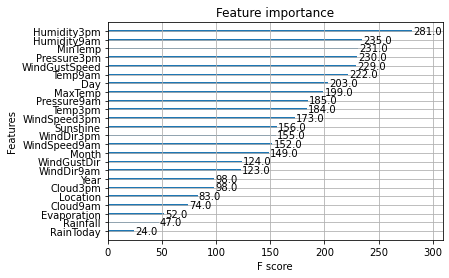

In [41]:
#import the neccessary libraries
from xgboost import XGBClassifier
from xgboost import plot_importance

# feature importance using xgboost classifier
model_xgb = XGBClassifier(random_state = 0 )
model_xgb.fit(x, y)

print("Feature Importances : ", model_xgb.feature_importances_)

# plot feature importance
plot_importance(model_xgb)
plt.show()

From the feature importance, we can see the importance of each features to our model. A feature will have a greater impact on the model used to forecast a certain variable if it has a higher score.

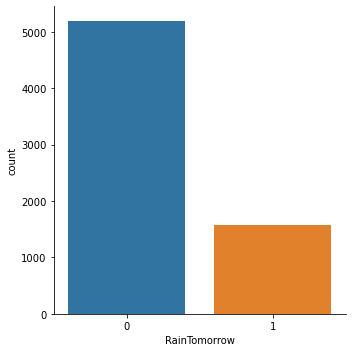

In [42]:
#This catplot shows the count of Marital Status of the applicants.
sns.catplot(x ='RainTomorrow', data = rainfall_predict, kind = 'count')

In [43]:
#Using SMOTE algorithm to balance the quality variable
oversam = SMOTE()
X_resam, y_resam = oversam.fit_resample(x, y)
y_resam.value_counts()

0    5190
1    5190
Name: RainTomorrow, dtype: int64

Our class counts are now balanced.

# Prediction for whether or not it will rain tomorrow.

In [44]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resam, y_resam, test_size = 0.20, random_state = 42)
#viewing the dimension of our train and test variales for our independent and target variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8304, 24), (2076, 24), (8304,), (2076,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. Adaboost classifier

In [45]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_ab)
print(confusion_matrix(y_test, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.8395953757225434


[[876 168]
 [165 867]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1044
           1       0.84      0.84      0.84      1032

    accuracy                           0.84      2076
   macro avg       0.84      0.84      0.84      2076
weighted avg       0.84      0.84      0.84      2076



### Cross Validation Score for Adaboost classifier

In [46]:
# Specify the cross-validation strategy
results = []
scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.83985551 0.82661048 0.82661048 0.8308248  0.82048193]
Mean accuracy: 0.83


The difference between the accuracy score and the cross validation score is: 0.01071873732065165


## 2. Random Forest

In [47]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_predrf)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_predrf)
print(confusion_matrix(y_test, y_predrf))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.90


[[932 112]
 [ 89 943]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1044
           1       0.89      0.91      0.90      1032

    accuracy                           0.90      2076
   macro avg       0.90      0.90      0.90      2076
weighted avg       0.90      0.90      0.90      2076



#### Cross Validation Score for Random Forest

In [48]:

scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.88621312 0.88982541 0.88440698 0.89163155 0.88975904]
Mean accuracy: 0.89


The difference between the accuracy score and the cross validation score is: 0.014811971120361922


## 3. Gradient Boosting Classifier

In [49]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.8641618497109826


[[926 118]
 [164 868]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1044
           1       0.88      0.84      0.86      1032

    accuracy                           0.86      2076
   macro avg       0.86      0.86      0.86      2076
weighted avg       0.86      0.86      0.86      2076



#### Cross Validation Score for Gradient Boosting Classifier

In [50]:
scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.86694762 0.8512944  0.85611078 0.86694762 0.85903614]
Mean accuracy: 0.86


The difference between the accuracy score and the cross validation score is: 0.004094536508745583


## 4. KNeighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, prediction_knn)
# Display a classification report for more detailed metrics
print(f"The Accuracy for knn is: ", accuracy)
print('\n')

print(confusion_matrix(y_test, prediction_knn))
print(classification_report(y_test, prediction_knn))

The Accuracy for knn is:  0.8636801541425819


[[806 238]
 [ 45 987]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1044
           1       0.81      0.96      0.87      1032

    accuracy                           0.86      2076
   macro avg       0.88      0.86      0.86      2076
weighted avg       0.88      0.86      0.86      2076



#### Cross Validation Score for KNeighbors Classifier

In [52]:
scores = cross_val_score(knn, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['k-Nearest Neighbors',accuracy, mean_score, diff])

Cross-validation scores: [0.83684527 0.83142685 0.84406984 0.84527393 0.84096386]
Mean accuracy: 0.84


The difference between the accuracy score and the cross validation score is: 0.02396420425029766


## 5. Xgboost Classifier

In [53]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.9089595375722543


[[970  74]
 [115 917]]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1044
           1       0.93      0.89      0.91      1032

    accuracy                           0.91      2076
   macro avg       0.91      0.91      0.91      2076
weighted avg       0.91      0.91      0.91      2076



In [54]:
scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.89765202 0.89644792 0.89825406 0.90246839 0.88915663]
Mean accuracy: 0.90


The difference between the accuracy score and the cross validation score is: 0.012163733041669733


In [55]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Adaboost classifier,0.839595,0.828877,0.010719
1,Random Forest,0.903179,0.888367,0.014812
2,Gradient Boosting Classifier,0.864162,0.860067,0.004095
3,k-Nearest Neighbors,0.863680,0.839716,0.023964
4,Xgboost Classifier,0.908960,0.896796,0.012164


### Selection of the best model

In [56]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Gradient Boosting Classifier


For the RainTomorrow  prediction, we selected the Gradient Boosting Classifier as our best model because it had the smallest value after the accuracy score was subtracted from the cross validation score.

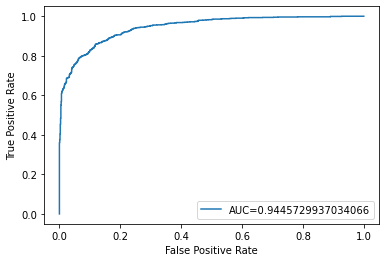

In [57]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 94.5%

In [58]:
#Search for the best hyperparameter for model tuning RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model_best = GradientBoostingClassifier()

model_param = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7],
    'min_samples_leaf':[1,2,3]
           }

In [59]:
from sklearn.model_selection import RandomizedSearchCV
rd_search = RandomizedSearchCV(model_best, model_param, cv = 5)

rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'n_estimators': [10, 100, 200]})

In [60]:
#display the best parameters from the search
print("The best max_depth is : " + str(rd_search.best_params_["max_depth"]),
     "\nThe best n_estimators: " + str(rd_search.best_params_["n_estimators"]),
     "\nThe best max_features: " + str(rd_search.best_params_["max_features"]),
      "\nThe best min_samples_leaf: " + str(rd_search.best_params_["min_samples_leaf"]))

The best max_depth is : None 
The best n_estimators: 200 
The best max_features: 7 
The best min_samples_leaf: 2


In [61]:
# train the model with the selected parameters
loan_model = GradientBoostingClassifier(max_depth =None, n_estimators  = 200, max_features =7, min_samples_leaf = 2)
loan_model.fit(X_train, y_train)
y_pred = loan_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9113680154142582

In [63]:
import pickle
# save the model to disk
filename = 'Rain_Tomorrow.sav'
pickle.dump(loan_model, open(filename, 'wb'))

In [64]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

#converting the values of our RainTomorrow back to yes and no.
accuracy_dataframe = accuracy_dataframe.replace({0: 'No', 1: 'Yes'})
accuracy_dataframe

,Actual,Predicted
10317,Yes,Yes
1123,No,No
562,Yes,Yes
8829,Yes,Yes
6323,No,No
...,...,...
58,No,No
6654,No,No
7585,Yes,Yes
9314,Yes,Yes


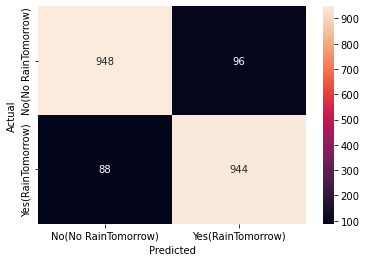

In [65]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['No(No RainTomorrow)', 'Yes(RainTomorrow)']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model for the prediction of how much rainfall could be there

In [66]:
#Viewing the first 10 rows in our dataset
rainfall_predict.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2,1,2008
1,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2,2,2008
2,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2,3,2008
3,1,9.2,28.0,0.0,4.6,8.7,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2,4,2008
4,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2,5,2008
5,1,14.6,29.7,0.2,4.6,8.7,14,56.0,13,13,...,1005.4,5.0,5.0,20.6,28.9,0,0,2,6,2008
6,1,14.3,25.0,0.0,4.6,8.7,13,50.0,12,13,...,1008.2,1.0,5.0,18.1,24.6,0,0,2,7,2008
7,1,7.7,26.7,0.0,4.6,8.7,13,35.0,10,13,...,1010.1,5.0,5.0,16.3,25.5,0,0,2,8,2008
8,1,9.7,31.9,0.0,4.6,8.7,6,70.0,9,7,...,1003.6,5.0,5.0,18.3,30.2,0,1,2,9,2008
9,1,13.1,30.1,1.4,4.6,8.7,13,28.0,8,10,...,1005.7,5.0,5.0,20.1,28.2,1,0,2,10,2008


In [67]:
#Returns the count of unique occurrences in the Self_Employed column.
rainfall_predict['Rainfall'].value_counts()

0.0    5809
0.2     321
0.4     144
0.6      87
1.2      69
1.4      66
1.0      65
0.8      64
1.8      49
1.6      47
0.1      28
0.5       7
1.5       3
0.7       2
1.9       1
Name: Rainfall, dtype: int64

We have the problem of imbalance data here in our continuous variable. For regression tasks, where the target variable is continuous, having a lot of zeros can have an impact on the model's performance. Having a dataset with a high number of zeros in the target is referred to as zero-inflated dataset. We are going to solve this by categorizing the Rainfall values into a binary variable indicating whether it is zero or not zero.

<AxesSubplot:>

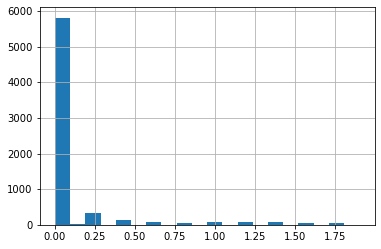

In [68]:
#Histogram of the Rainfall
rainfall_predict['Rainfall'].hist(bins = 20)

In [69]:
#Viewing the first 10 rows in our dataset before categorization of the rainfall column
rainfall_predict.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2,1,2008
1,1,7.4,25.1,0.0,4.6,8.7,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2,2,2008
2,1,12.9,25.7,0.0,4.6,8.7,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2,3,2008
3,1,9.2,28.0,0.0,4.6,8.7,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2,4,2008
4,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2,5,2008


In [70]:
#Categorizing the rainfall column
rainfall_predict['Rainfall_binary'] = (rainfall_predict['Rainfall'] > 0).astype(int)

In [71]:
#selecting all the data when rainfall value is greater than zero
rainfall_predict_nonzero = rainfall_predict.loc[(rainfall_predict['Rainfall'] > 0), :]

#selecting all the data when rainfall value is equal to zero
rainfall_predict_zero = rainfall_predict.loc[(rainfall_predict['Rainfall'] == 0), :]

In [72]:
#Displaying all the data where rainfall value is greater than zero
rainfall_predict_nonzero

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year,Rainfall_binary
0,1,13.4,22.9,0.6,4.6,8.7,13,44.0,13,14,...,8.0,5.0,16.9,21.8,0,0,2,1,2008,1
4,1,17.5,32.3,1.0,4.6,8.7,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0,2,5,2008,1
5,1,14.6,29.7,0.2,4.6,8.7,14,56.0,13,13,...,5.0,5.0,20.6,28.9,0,0,2,6,2008,1
9,1,13.1,30.1,1.4,4.6,8.7,13,28.0,8,10,...,5.0,5.0,20.1,28.2,1,0,2,10,2008,1
29,1,12.5,24.2,1.2,4.6,8.7,14,50.0,15,12,...,8.0,8.0,12.5,18.2,1,0,2,30,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,4,24.2,35.2,0.6,5.2,11.5,5,35.0,8,6,...,1.0,1.0,28.6,33.6,0,0,10,23,2012,1
8368,4,23.5,35.3,0.4,4.6,11.3,5,41.0,4,5,...,4.0,2.0,29.6,34.3,0,0,10,24,2012,1
8370,4,24.7,34.3,0.2,5.8,10.0,6,35.0,4,6,...,7.0,3.0,30.7,33.9,0,0,10,26,2012,1
8377,4,25.6,34.1,1.0,4.6,11.3,3,35.0,5,6,...,4.0,3.0,29.2,33.1,0,1,9,2,2012,1


We shall build our model with data having rainfall values greater than zero. We have 953 rows of data and 26 columns.

In [74]:
# Define features (X) and target variable (y)
X = rainfall_predict_nonzero.drop(['Rainfall','Rainfall_binary'],axis =1)
y = rainfall_predict_nonzero['Rainfall']
y

0       0.6
4       1.0
5       0.2
9       1.4
29      1.2
       ... 
8367    0.6
8368    0.4
8370    0.2
8377    1.0
8394    0.4
Name: Rainfall, Length: 953, dtype: float64

We dropped the Rainfall, Rainfall_binary columns from our independent variable. Our target variable is now rainfall where the values are greater than zero only.

In [75]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,-1.443127,0.147067,0.146235,0.212888,0.394259,1.188003,0.544614,1.259094,1.357426,1.011414,...,-1.460400,1.250793,-0.062233,0.074833,0.203880,-0.572100,-0.651548,-1.094195,-1.691216,-1.775220
1,-1.443127,0.894805,1.904154,0.212888,0.394259,1.188003,0.299563,-1.439875,-0.339293,-0.417611,...,-1.654204,0.814481,1.372645,0.235455,1.715256,-0.572100,-0.651548,-1.094195,-1.225028,-1.775220
2,-1.443127,0.365918,1.417921,0.212888,0.394259,1.405560,1.524816,1.259094,1.115038,0.901489,...,-1.759915,-0.058144,-0.062233,0.735168,1.562205,-0.572100,-0.651548,-1.094195,-1.108481,-1.775220
3,-1.443127,0.092355,1.492726,0.212888,0.394259,1.188003,-0.762322,0.134524,0.387872,0.461789,...,-1.707060,-0.058144,-0.062233,0.645934,1.428286,1.747947,-0.651548,-1.094195,-0.642293,-1.775220
4,-1.443127,-0.017070,0.389351,0.212888,0.394259,1.405560,1.034715,1.708922,0.872649,0.022089,...,-2.112287,1.250793,1.372645,-0.710430,-0.484848,1.747947,-0.651548,-1.094195,1.688648,-1.775220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,-0.444361,2.116719,2.446490,1.241007,1.411216,-0.552453,-0.190538,0.134524,-0.581681,-0.417611,...,-1.618967,-1.803395,-1.975404,2.162920,2.461378,-0.572100,-0.651548,1.346455,0.872819,-0.102256
949,-0.444361,1.989056,2.465191,0.212888,1.338576,-0.552453,0.299563,-0.765133,-0.824070,0.461789,...,-1.707060,-0.494457,-1.497112,2.341389,2.595297,-0.572100,-0.651548,1.346455,0.989366,-0.102256
950,-0.444361,2.207906,2.278179,2.269126,0.866418,-0.334896,-0.190538,-0.765133,-0.581681,0.241939,...,-1.478018,0.814481,-1.018819,2.537704,2.518772,-0.572100,-0.651548,1.346455,1.222460,-0.102256
951,-0.444361,2.372044,2.240776,0.212888,1.338576,-0.987567,-0.190538,-0.540219,-0.581681,-0.197761,...,-1.495637,-0.494457,-1.018819,2.270001,2.365721,-0.572100,1.534807,1.041374,-1.574669,-0.102256


In [89]:
# splitting the features into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((762, 24), (191, 24), (762,), (191,))

We splitted our data in x_train, x_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 70% of our data will be used to train the model while 30% will be used for model validation.

## 1. Random Forest Regressor

In [90]:
#Random Forest Regressor
random_for= RandomForestRegressor()
random_for.fit(x_train, y_train)

rf_pred = random_for.predict(x_test)
train_predrd = random_for.predict(x_train)
mse = metrics.mean_absolute_error(y_test, rf_pred)
msqe = metrics.mean_squared_error(y_test, rf_pred)
r2_score = metrics.r2_score(y_test, rf_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.2126178010471205
mean_squared_error  :  0.06489723560209425
root_mean_absolute_error 0.2547493583938814
R2_score            :  0.7529287216456975
R2_score on training data :  0.9659082610576117




This model is performing better on training data

### Cross Validation Score for Random Forest Regressor

In [91]:
from sklearn.model_selection import KFold
results = []
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score1 = cross_val_score(random_for,x,y, cv=k_fold, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
cross_val = cv_score1.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,rf_pred)- cv_score1.mean()}')
results.append(['Random Forest Regressor', r2_score, cross_val, diff])

[0.75244659 0.69655133 0.75291354 0.78831054 0.7759451 ]
0.7532334207490597
The difference between the R2 score and the cross validation score is: -0.00030469910336228256


## 2. Gradient Boosting Regressor

In [92]:
#Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

gb_pred = gb.predict(x_test)
train_pred = gb.predict(x_train)
mse = metrics.mean_absolute_error(y_test, gb_pred)
msqe = metrics.mean_squared_error(y_test, gb_pred)
r2_score = metrics.r2_score(y_test, gb_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, gb_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')

mean_absolute_error :  0.20203002218165017
mean_squared_error  :  0.06421094226850664
root_mean_absolute_error 0.2533987811109332
R2_score            :  0.7555415197053124
R2_score on training data :  0.888335563733062




### Cross Validation Score for Gradient Boosting Regressor

In [93]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score2 = cross_val_score(gb,x,y, cv=k_fold, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
cross_val = cv_score2.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,gb_pred)- cv_score2.mean()}')
results.append(['Gradient Boosting Regressor', r2_score, cross_val, diff])

[0.75358693 0.70690512 0.75721916 0.75723909 0.76480354]
0.7479507678091394
The difference between the R2 score and the cross validation score is: 0.007590751896172976


## 3. Decision Tree Regressor

In [94]:
#Decision Tree
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
ypred_dc = dec_tree.predict(x_test)
train_preddc = dec_tree.predict(x_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  0.2612565445026178
mean_squared_error  :  0.1267539267015707
root_mean_absolute_error 0.35602517706135717
R2_score            :  0.517433147713706
R2_score on training data :  1.0




This model is performing better on training data

### Cross Validation Score for Decision Tree Regressor

In [95]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score3 = cross_val_score(dec_tree,x,y, cv=k_fold, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
cross_val = cv_score3.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score3.mean()}')
results.append(['Decision Tree Regressor', r2_score, cross_val, diff])

[0.47816604 0.4969032  0.56632023 0.54914873 0.52681111]
0.5234698602378106
The difference between the R2 score and the cross validation score is: -0.006036712524104648


## 4. AdaBoost Regressor

In [96]:
#AdaBoost
ad = AdaBoostRegressor()
ad.fit(x_train, y_train)

ypredad = ad.predict(x_test)
train_predad = ad.predict(x_train)
mse = metrics.mean_absolute_error(y_test, ypredad)
msqe = metrics.mean_squared_error(y_test, ypredad)
r2_score = metrics.r2_score(y_test, ypredad)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypredad))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predad))
print('\n')

mean_absolute_error :  0.22491476574517313
mean_squared_error  :  0.06886236266251543
root_mean_absolute_error 0.2624163917565277
R2_score            :  0.7378330245398583
R2_score on training data :  0.7842957983872431




### Cross Validation Score AdaBoost Regressor

In [97]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score4 = cross_val_score(ad,x,y, cv=k_fold, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
cross_val = cv_score4.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypredad)- cv_score4.mean()}')
results.append(['AdaBoost Regressor', r2_score, cross_val, diff])

[0.75901435 0.70348962 0.75446201 0.76989399 0.76471556]
0.7503151039887229
The difference between the R2 score and the cross validation score is: -0.012482079448864591


## 5. Ridge

In [98]:
#Ridge
Ridge = Ridge()
Ridge.fit(x_train, y_train)
ypred_rd = Ridge.predict(x_test)
train_predrd = Ridge.predict(x_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.20634703984505776
mean_squared_error  :  0.0649695740714928
root_mean_absolute_error 0.2548912985401675
R2_score            :  0.7526533207300394
R2_score on training data :  0.7811358406482481




### Cross Validation Score for Ridge

In [99]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score5 = cross_val_score(Ridge,x,y, cv=k_fold, scoring = 'r2')
print(cv_score5)
print(cv_score5.mean())
cross_val = cv_score5.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score5.mean()}')
results.append(['Ridge', r2_score, cross_val, diff])

[0.75265332 0.70676848 0.77013082 0.79806427 0.77849354]
0.7612220853259937
The difference between the R2 score and the cross validation score is: -0.008568764595954237


In [100]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df_result = pd.DataFrame(results, columns=['Algorithm', 'r2 Score','Cross Validation Score', 'Difference btw r2_score and Cross Validtion Score'])
df_result

,Algorithm,r2 Score,Cross Validation Score,Difference btw r2_score and Cross Validtion Score
0,Random Forest Regressor,0.752929,0.753233,-0.000305
1,Gradient Boosting Regressor,0.755542,0.747951,0.007591
2,Decision Tree Regressor,0.517433,0.523470,-0.006037
3,AdaBoost Regressor,0.737833,0.750315,-0.012482
4,Ridge,0.752653,0.761222,-0.008569


In [101]:
#Selection of the best model based on the difference between the r2 and cross validation score
least_value = min(df_result['Difference btw r2_score and Cross Validtion Score'].tolist())
best_model = df_result.loc[(df_result['Difference btw r2_score and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model for Average Cost for two Prediction is the', best_model)

From the table above, my best model for Average Cost for two Prediction is the AdaBoost Regressor


In [102]:
#Search for the best hyperparameter for model tuning 
from sklearn.model_selection import GridSearchCV

model_best = AdaBoostRegressor()

model_param =  {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}

In [103]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]})

In [104]:
#display the best parameters from the search
print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best random_state: " + str(gd_search.best_params_["random_state"]))

The best n_estimators is : 500 
The best learning_rate: 0.1 
The best random_state: 1


In [105]:
# train the model with the selected parameters
New_model = AdaBoostRegressor(n_estimators = 500, learning_rate  = 0.1, random_state = 1)

In [106]:
New_model.fit(x_train, y_train)
y_predmodel = New_model.predict(x_test)
train_predrd = New_model.predict(x_train)
mse_newmodel = metrics.mean_absolute_error(y_test, y_predmodel)
msqe_newmodel = metrics.mean_squared_error(y_test, y_predmodel)
r2_score_newmodel = metrics.r2_score(y_test, y_predmodel)
rmse_newmodel = np.sqrt(metrics.mean_squared_error(y_test, y_predmodel))
print("mean_absolute_error : ", mse_newmodel)
print("mean_squared_error  : ", msqe_newmodel)
print("root_mean_absolute_error", rmse_newmodel)
print("R2_score            : ", r2_score_newmodel)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')


mean_absolute_error :  0.21462611351885308
mean_squared_error  :  0.06330041761187838
root_mean_absolute_error 0.2515957424359132
R2_score            :  0.7590079923339093
R2_score on training data :  0.7811536095457989




In [107]:
import pickle
# save the model to disk
filename = 'rainfall.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [108]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(x_test,y_test)
result

0.7590079923339093

In [109]:
accuracy_dataframe = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
Predicted,0.436025,0.471332,0.44967,1.468224,0.461062,0.474737,0.495714,0.474737,0.392565,0.466818,...,0.451724,0.474737,0.471332,0.426757,0.48912,0.3,0.399531,1.522819,0.466818,0.464169
Original,0.400000,0.800000,0.40000,1.600000,0.200000,0.600000,0.600000,0.200000,0.800000,0.400000,...,0.200000,0.400000,0.600000,0.200000,0.20000,0.4,0.800000,1.800000,0.500000,0.400000


### Conclusion

We used the weatherAUS dataset as our case study to make to forecast whether or not it will rain tomorrow and to predict how much rainfall could be there. The dataset is made up 8425 rows and 23 columns. Of these columns, we have 22 independent variables and 1 target variable(either Rainfall or RainTomorrow). Most of the columns have missing values. We treated them by filling the missing values using the modal methods for our categorical variables and the median method for our numerical variables. We visualized the data distribution and relationships between some features. For this project, we built two models to make predictions for RainTomorrow and Rainfall. We used different algorithms to train our model. 80% of the data was used for training while 20% was used for validation. The criteria we used in the selection of best model is the model with the least result after substracting the r2 score/accuracy from cross validation score. 

### RainTomorrow Prediction:
This is a binary classification problem because the target variable is classified into two categories. From the count of target variable(RainTomorrow) we saw that the counts where not balanced so we used the SMOTE algorithm to balance the count before building our model. We used different classification algorithms to train our model. Gradient Boosting Classifier is our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.864162 and after tuning with set parameters, there was an improvement in the accuracy score 0.911368. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict all labels correctly. We can also see from the confusion matrix that the model predicted that 948(will not rain tomorrow) and truely it did not rain(True Negative). It predicted 944(will rain tomorrow) and it rained(True Positive). The model predicted that 88(will not rain tomorrow) whereas, it rained(False Negative). Predicted 96(will rain tomorrow) but it did not rain(False Positive).

### Rainfall  Prediction:
This is a regression problem because the target variable is continuous. For the Rainfall column, we had 5299 count of the value 0(zero). This is referred to as zero-inflated datasets. Alot of missing information and so will cause problems in our regression model. Regression model cannot predict zero values. We resolved the zero_inflated issue by categorizing the Rainfall values into a binary variable indicating whether it is zero or not zero. We selected only the rainfall values greater than zero as our target varaibles. We had 953 rows and 26 columns in our new generated data. We splitted the data into train and test. We used different regression algorithms to train our model. We selected the Adaboost Regression model as our best model because it had the least result from the difference between our r2_score and Cross Validation Score. We tuned the best model and observed that there was an improvement in the r2 score obtained. The r2_score before tuning was 0.737833 and 0.759008 after tuning. For a better model performance, we will need to train with more data.
